In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def RSI(asset):
    df = yf.download(asset, start='2022-09-01')
    df['MA20'] = df['Adj Close'].rolling(window=200).mean()
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['avg Down'] = df['Downmove'].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = df['avg Up']/df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA20']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA20']) | (df['RSI'] > 30), 'Buy'] = 'No'
    return df

In [3]:
BTC = RSI('AAPL')

[*********************100%%**********************]  1 of 1 completed


C:\Users\koobie\AppData\Local\Temp/ipykernel_16772/2309392243.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
C:\Users\koobie\AppData\Local\Temp/ipykernel_16772/2309392243.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
C:\Users\koobie\AppData\Local\Temp/ipykernel_16772/2309392243.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [4]:
BTC

,Open,High,Low,Close,Adj Close,Volume,MA20,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2023-06-20,184.410004,186.100006,184.410004,185.009995,184.517410,49799100,152.557762,0.000487,0.000487,0.000000,0.004900,0.001958,2.502863,71.451925,No
2023-06-21,184.899994,185.410004,182.589996,183.960007,183.470215,49515700,152.691004,-0.005675,0.000000,0.005675,0.004410,0.002329,1.893071,65.434650,No
2023-06-22,183.740005,187.050003,183.669998,187.000000,186.502121,51245300,152.850078,0.016525,0.016525,0.000000,0.005621,0.002096,2.681318,72.835812,No
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.182953,53079300,153.013910,-0.001711,0.000000,0.001711,0.005059,0.002058,2.458347,71.084448,No
2023-06-26,186.830002,188.050003,185.229996,185.270004,184.776733,48088700,153.163612,-0.007553,0.000000,0.007553,0.004553,0.002607,1.746247,63.586668,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900,178.927155,0.002226,0.002226,0.000000,0.002901,0.002778,1.044448,51.087047,No
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800,179.127946,-0.005424,0.000000,0.005424,0.002611,0.003042,0.858242,46.185697,No
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.639999,82488700,179.280044,-0.035787,0.000000,0.035787,0.002350,0.006317,0.372026,27.115100,Yes


In [5]:
def getsignals(df):
    buying_dates = []
    selling_dates = []
    for i in range(len(df)):
        if "Yes" in df['Buy'].iloc[i]:
            buying_dates.append(df.iloc[i+1].name)
            for j in range(1, 11):
                if df['RSI'].iloc[i + j] > 40:
                    selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j == 10:
                    selling_dates.append(df.iloc[i+j+1].name)
    
    return buying_dates, selling_dates


In [6]:
buy, sell = getsignals(BTC)

IndexError: single positional indexer is out-of-bounds

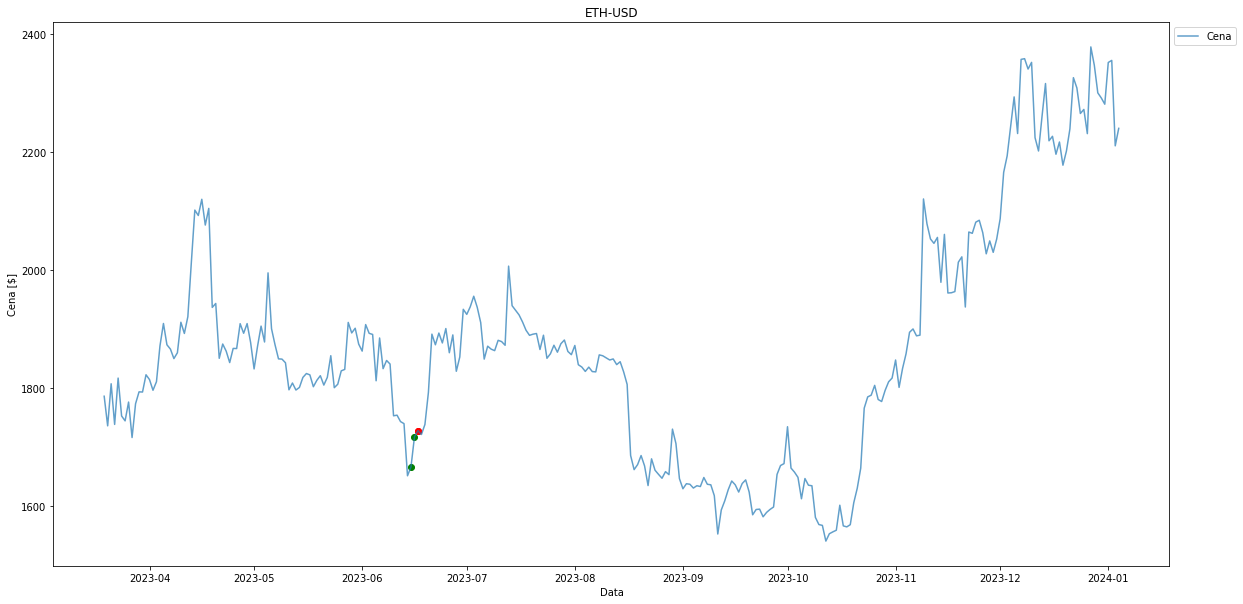

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(BTC.loc[buy].index, BTC.loc[buy]['Adj Close'], c='g')
plt.scatter(BTC.loc[sell].index, BTC.loc[sell]['Adj Close'], c='r')
plt.plot(BTC['Adj Close'], label='Cena', alpha=0.7)
plt.title('ETH-USD')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Data')
plt.ylabel('Cena [$]')
plt.show()

[*********************100%%**********************]  1 of 1 completed


C:\Users\koobie\AppData\Local\Temp/ipykernel_16772/3148529272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
C:\Users\koobie\AppData\Local\Temp/ipykernel_16772/3148529272.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
C:\Users\koobie\AppData\Local\Temp/ipykernel_16772/3148529272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

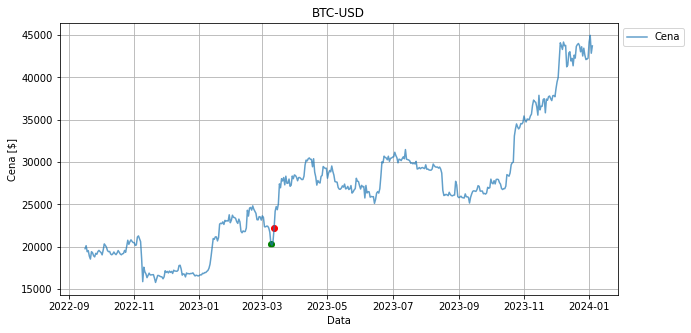

[*********************100%%**********************]  1 of 1 completed


C:\Users\koobie\AppData\Local\Temp/ipykernel_16772/3148529272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
C:\Users\koobie\AppData\Local\Temp/ipykernel_16772/3148529272.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
C:\Users\koobie\AppData\Local\Temp/ipykernel_16772/3148529272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

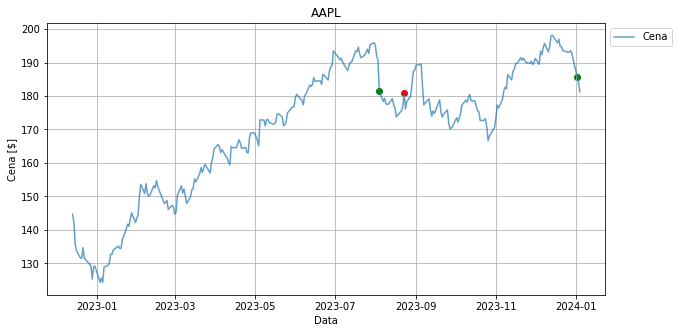

In [12]:
def RSIi(symbol):
    df = yf.download(symbol, start='2022-03-01')
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['avg Down'] = df['Downmove'].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = df['avg Up']/df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'

    # buys = []
    # sells = []
    # for i in range(len(df)):
    #     if "Yes" in df['Buy'].iloc[i]:
    #         buys.append(df.iloc[i+1].name)
    #         for j in range(1, 11):
    #             if df['RSI'].iloc[i + j] > 40:
    #                 sells.append(df.iloc[i+j+1].name)
    #                 break
    #             elif j == 10:
    #                 sells.append(df.iloc[i+j+1].name)

    buys = []
    sells = []
    in_position = False  # Track the last signal

    for i in range(len(df)):
        if not in_position:
            if df['Adj Close'].iloc[i] > df['MA200'].iloc[i] and df['RSI'].iloc[i] < 30:
                buys.append(df.index[i])
                in_position = True
        else:
            if df['RSI'].iloc[i] > 40:
                sells.append(df.index[i])
                in_position = False


    plt.figure(figsize=(10, 5))
    plt.scatter(df.loc[buys].index, df.loc[buys]['Adj Close'], c='g')
    plt.scatter(df.loc[sells].index, df.loc[sells]['Adj Close'], c='r')
    plt.plot(df['Adj Close'], label='Cena', alpha=0.7)
    plt.title(symbol)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlabel('Data')
    plt.ylabel('Cena [$]')
    plt.grid()
    plt.show()

RSIi('BTC-USD')

RSIi('AAPL')


In [ ]:

import warnings
warnings.filterwarnings('ignore')

[*********************100%%**********************]  1 of 1 completed


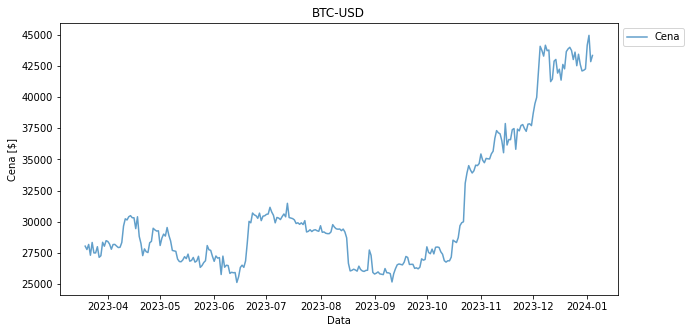

In [ ]:
RSIi('BTC-USD')